In [1]:
import util
from forward import solve_forward
from simulation import Simulation
import numpy as np

In [2]:
# import scipy.io

# arr = scipy.io.loadmat('./matlab/eeg_img_arr.mat')['eeg_arr']

arr = np.load('temp.npy')


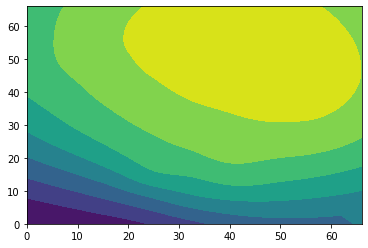

In [3]:
import matplotlib.pyplot as plt

plt.contourf(arr[:,:,1])

In [4]:
from net import EEG_CNN

fwd = solve_forward()
sim = Simulation(fwd=fwd)
sim.simulate(n_samples=10)

eegcnn = EEG_CNN(sim=sim, eeg_topographies=arr)

2021-12-09 18:45:56.994293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-09 18:45:56.994314: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Forward problem is solved.
Electrodes: (73, 3)
Dipoles: (50460, 3)
Leadfield: (73, 50460)
Simulate Sources.


100%|██████████| 10/10 [00:00<00:00, 26.08it/s]

Simulate EEG.
Project sources to EEG.


In [5]:
eegcnn.build_model()

2021-12-09 18:46:00.569352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-09 18:46:00.569406: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-09 18:46:00.569449: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thanos): /proc/driver/nvidia/version does not exist
2021-12-09 18:46:00.569906: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-09 18:46:00.624507: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2215116800 exceeds 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 65, 65, 128)       1280      
                                                                 
 dropout (Dropout)           (None, 65, 65, 128)       0         
                                                                 
 flatten (Flatten)           (None, 540800)            0         
                                                                 
 dense (Dense)               (None, 1024)              553780224 
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 4096)              8392704   
                                                                 
 OutputLayer (Dense)         (None, 50460)             2